In [95]:
import numpy as np
import pandas as pd 
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt 

In [96]:
import tensorflow as tf
from tensorflow import keras

In [97]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()

In [98]:
#predicting the price of house using 8 independent variables
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [99]:
#Target to find the value of house
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [100]:
from sklearn.model_selection import train_test_split
x_train_full,x_test,y_train_full,y_test=train_test_split(housing.data,housing.target,random_state=42)
x_train,x_valid,y_train,y_valid=train_test_split(x_train_full,y_train_full,random_state=42)

In [101]:
#standarise the data
from sklearn.preprocessing import StandardScaler

In [102]:
scaler=StandardScaler()

In [103]:
x_train=scaler.fit_transform(x_train)
x_valid=scaler.transform(x_valid)
x_test=scaler.transform(x_test)

In [104]:
x_train.shape

(11610, 8)

In [105]:
y_train.shape

(11610,)

In [106]:
x_test.shape

(5160, 8)

In [107]:
y_test.shape

(5160,)

In [108]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=[8]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])

In [109]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 30)                270       
                                                                 
 dense_16 (Dense)            (None, 30)                930       
                                                                 
 dense_17 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1231 (4.81 KB)
Trainable params: 1231 (4.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [110]:
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['mae']
             )

In [111]:
print(x_train.shape)
print(y_train.shape)

(11610, 8)
(11610,)


In [117]:
#train the model
model_history=model.fit(x_train,y_train,epochs=20,validation_data=(x_valid,y_valid))


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4027 - mae: 0.4598 - val_loss: 0.4257 - val_mae: 0.4458
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3998 - mae: 0.4569 - val_loss: 0.4493 - val_mae: 0.4507
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3972 - mae: 0.4557 - val_loss: 0.4301 - val_mae: 0.4435
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3948 - mae: 0.4536 - val_loss: 0.4179 - val_mae: 0.4444
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3927 - mae: 0.4519 - val_loss: 0.4044 - val_mae: 0.4412
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3905 - mae: 0.4506 - val_loss: 0.4121 - val_mae: 0.4391
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3889 - mae: 0.4492 - val_loss: 0.4065 - val_mae: 0.4380
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [118]:
mae_test=model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3691 - mae: 0.4360


In [119]:
model_history.history

{'loss': [0.4027157425880432,
  0.3997906744480133,
  0.3971780240535736,
  0.3947574198246002,
  0.39271095395088196,
  0.3905218839645386,
  0.38886913657188416,
  0.3871859312057495,
  0.38551414012908936,
  0.383897602558136,
  0.3827698826789856,
  0.38110941648483276,
  0.37994223833084106,
  0.3787088394165039,
  0.3774610757827759,
  0.37628471851348877,
  0.37528809905052185,
  0.3743741810321808,
  0.3729206323623657,
  0.37223732471466064],
 'mae': [0.4598331153392792,
  0.4568541944026947,
  0.4556511640548706,
  0.4535711407661438,
  0.45194026827812195,
  0.45062220096588135,
  0.44916588068008423,
  0.4479297399520874,
  0.44679147005081177,
  0.44563281536102295,
  0.44417718052864075,
  0.44342899322509766,
  0.4423396587371826,
  0.4412226676940918,
  0.44058099389076233,
  0.4399563670158386,
  0.4389473497867584,
  0.4382334351539612,
  0.43687283992767334,
  0.436434268951416],
 'val_loss': [0.42569947242736816,
  0.4493364989757538,
  0.4300842583179474,
  0.41791

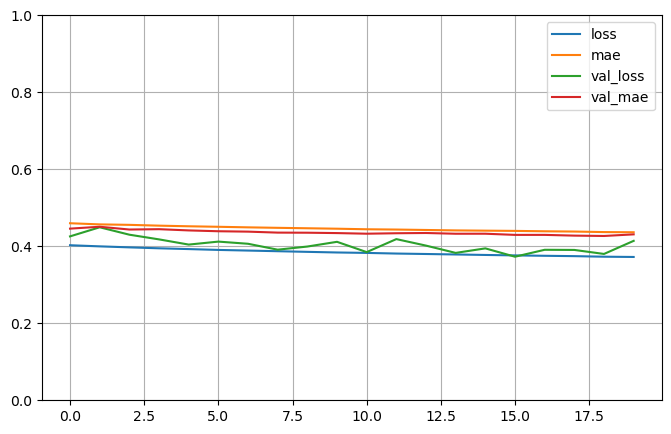

In [120]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [116]:
#graph is going down wrt more epochs hence converges down we get correct model


In [121]:
x_new=x_test[:3]

In [125]:
y_pred=model.predict(x_new)
print(y_pred)
print(y_test[:3])

1/1 [==============================] - 0s 22ms/step
[[0.76902384]
 [1.9378378 ]
 [3.90417   ]]
[0.477   0.458   5.00001]


In [126]:
del model
keras.backend.clear_session

<function keras.src.backend.clear_session()>

In [129]:
#Functionla API

input_=keras.layers.Input(shape=x_train.shape[1:])
hidden1=keras.layers.Dense(30,activation="relu")(input_)
hidden2=keras.layers.Dense(30,activation="relu")(hidden1)
concat=keras.layers.concatenate([input_,hidden2])
output=keras.layers.Dense(1)(concat)
model=keras.models.Model(inputs=[input_],outputs=[output])

In [130]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_20 (Dense)            (None, 30)                   270       ['input_3[0][0]']             
                                                                                                  
 dense_21 (Dense)            (None, 30)                   930       ['dense_20[0][0]']            
                                                                                                  
 concatenate (Concatenate)   (None, 38)                   0         ['input_3[0][0]',             
                                                                     'dense_21[0][0]']        

In [132]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=['mae'])

In [138]:
model_history=model.fit(x_train,y_train,epochs=20, validation_data=(x_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4096 - mae: 0.4585 - val_loss: 0.3875 - val_mae: 0.4436
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4066 - mae: 0.4562 - val_loss: 0.3985 - val_mae: 0.4475
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4043 - mae: 0.4558 - val_loss: 0.3811 - val_mae: 0.4401
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4011 - mae: 0.4534 - val_loss: 0.3783 - val_mae: 0.4427
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3992 - mae: 0.4527 - val_loss: 0.3752 - val_mae: 0.4381
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3962 - mae: 0.4510 - val_loss: 0.3780 - val_mae: 0.4378
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3946 - mae: 0.4496 - val_loss: 0.3699 - val_mae: 0.4352
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.

In [139]:
model_test=model.evaluate(x_test,y_test)

162/162 [==============================] - 1s 3ms/step - loss: 0.3703 - mae: 0.4347


In [140]:
#loss=0.404
model_history.history

{'loss': [0.4096227288246155,
  0.40658852458000183,
  0.4043441116809845,
  0.4010898768901825,
  0.3992343842983246,
  0.3962441384792328,
  0.39464470744132996,
  0.3923444449901581,
  0.3902372717857361,
  0.38854870200157166,
  0.3869796395301819,
  0.3850512206554413,
  0.3840700089931488,
  0.38220274448394775,
  0.38062599301338196,
  0.3794749975204468,
  0.37780827283859253,
  0.37715694308280945,
  0.3754054307937622,
  0.3743841052055359],
 'mae': [0.4584660232067108,
  0.456236332654953,
  0.45581021904945374,
  0.4534231126308441,
  0.4526645541191101,
  0.451007217168808,
  0.4495648443698883,
  0.4483245313167572,
  0.4473276734352112,
  0.44615280628204346,
  0.44450533390045166,
  0.44372615218162537,
  0.44276103377342224,
  0.4416735768318176,
  0.4410801827907562,
  0.4403137266635895,
  0.43924078345298767,
  0.4384404420852661,
  0.4374156892299652,
  0.4366503357887268],
 'val_loss': [0.38748690485954285,
  0.398477703332901,
  0.3811013102531433,
  0.3783069550

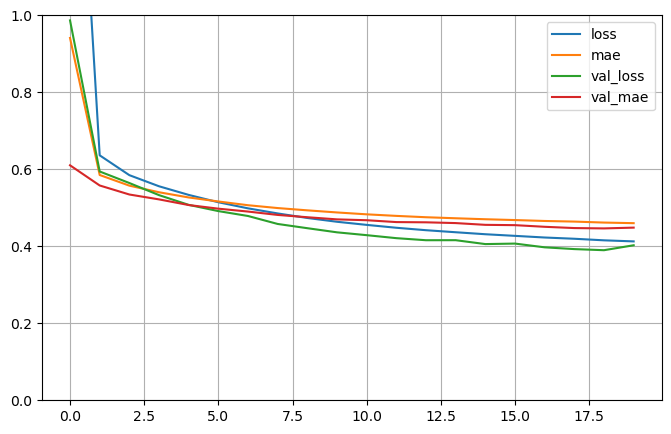

In [137]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

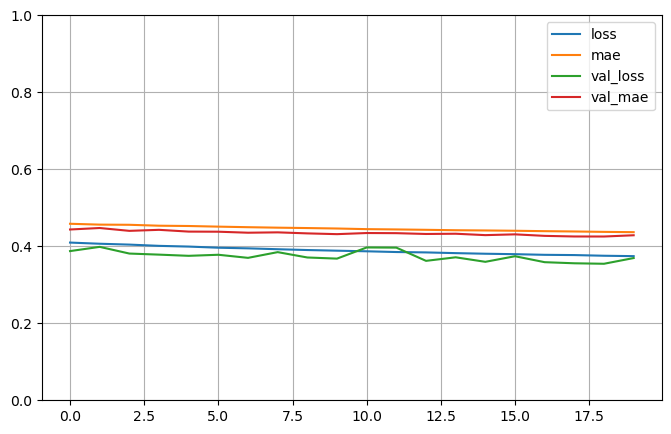

In [141]:
#scope of improvement therefore we will run again 20 epochs 



pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [142]:
#performance increases

In [143]:
model.save("my_Func_model.h5")#name of model .h5


C:\Users\AYUSH SINGH\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [144]:
%pwd

'C:\\Users\\AYUSH SINGH\\projects_ML'

In [145]:
del model 

In [147]:
keras.backend.clear_session()

In [148]:
model=keras.models.load_model("my_Func_model.h5")

In [149]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_20 (Dense)            (None, 30)                   270       ['input_3[0][0]']             
                                                                                                  
 dense_21 (Dense)            (None, 30)                   930       ['dense_20[0][0]']            
                                                                                                  
 concatenate (Concatenate)   (None, 38)                   0         ['input_3[0][0]',             
                                                                     'dense_21[0][0]']        

In [150]:
y_pred=model.predict(x_new)
print(y_pred)

1/1 [==============================] - 0s 67ms/step
[[0.7403848]
 [1.8040783]
 [3.7823489]]


In [151]:
#usualy we have a large datasets  which can take upto 8 to 10 hours  to train the mosel for this ewe use callbacks

# just like checkpoint allow you to save the model at every checkpoint


In [152]:
#using callbacks duriong training

In [154]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [155]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=[8]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])

In [183]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [157]:
#checkpoint create
checkpoint_cb=keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5")#10 file created for each epochs  Model-{epoch:02d}.h5 

In [158]:
#train the model
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_valid,y_valid),callbacks=[checkpoint_cb])


Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 2.5088 - val_loss: 2.1146
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7517 - val_loss: 0.7942
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.6530 - val_loss: 0.6086
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6118 - val_loss: 0.5757
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5810 - val_loss: 0.5464
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5526 - val_loss: 0.5200
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5286 - val_loss: 0.5033
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5070 - val_loss: 0.4782
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4887 - val_loss: 0.4572
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4733 - val_loss: 0.4422

In [175]:
del model 
keras.backend.clear_session()

In [176]:
model=keras.models.load_model("Model-10.h5")

In [177]:
mse_test=model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 754us/step - loss: 0.4517


In [178]:
# we want the best model loss minimum 

In [189]:
del model 
keras.backend.clear_session()

In [190]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=[8]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])

In [197]:
#checkpoint create
checkpoint_cb=keras.callbacks.ModelCheckpoint("Best_Model.h5",save_best_only=True)#10 file created for each epochs  Model-{epoch:02d}.h5 

In [198]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [199]:
#train the model
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_valid,y_valid),callbacks=[checkpoint_cb])


Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 2.3753 - val_loss: 1.3739
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8819 - val_loss: 0.7396
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7268 - val_loss: 0.6960
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6684 - val_loss: 0.6436
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6237 - val_loss: 0.6004
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5827 - val_loss: 0.5643
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5466 - val_loss: 0.5361
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5140 - val_loss: 0.4982
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4868 - val_loss: 0.4703
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4653 - val_loss: 0.4479

In [200]:
model=keras.models.load_model("Best_Model.h5")#rollback to best model
mse_test=model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 742us/step - loss: 0.4436


In [201]:
#we use early stop for large epocs say 200 our performance is decrecrsing from 60th epoch so we stop at 60 and choose the best model .
#best way to train the models

In [202]:
del model 
keras.backend.clear_session()

In [203]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=[8]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])

In [205]:
#checkpoint create
checkpoint_cb=keras.callbacks.ModelCheckpoint("early_stop_model.h5",save_best_only=True)#10 file created for each epochs  Model-{epoch:02d}.h5 

In [206]:

early_stopping_cb=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)#

In [208]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [211]:
#train the model
history=model.fit(x_train,y_train,epochs=200,validation_data=(x_valid,y_valid),callbacks=[checkpoint_cb,early_stopping_cb])


Epoch 1/200
363/363 [==============================] - 1s 2ms/step - loss: 0.4108 - val_loss: 0.3983
Epoch 2/200
363/363 [==============================] - 1s 2ms/step - loss: 0.4060 - val_loss: 0.4712
Epoch 3/200
363/363 [==============================] - 1s 2ms/step - loss: 0.4025 - val_loss: 0.4417
Epoch 4/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3986 - val_loss: 0.4014
Epoch 5/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3957 - val_loss: 0.3751
Epoch 6/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3921 - val_loss: 0.4453
Epoch 7/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3904 - val_loss: 0.3863
Epoch 8/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3878 - val_loss: 0.3623
Epoch 9/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3856 - val_loss: 0.3875
Epoch 10/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3836 - val_lo

363/363 [==============================] - 0s 1ms/step - loss: 0.3379 - val_loss: 0.3352
Epoch 82/200
363/363 [==============================] - 0s 1ms/step - loss: 0.3375 - val_loss: 0.3274
Epoch 83/200
363/363 [==============================] - 0s 1ms/step - loss: 0.3372 - val_loss: 0.3208
Epoch 84/200
363/363 [==============================] - 0s 1ms/step - loss: 0.3366 - val_loss: 0.3704
Epoch 85/200
363/363 [==============================] - 0s 1ms/step - loss: 0.3365 - val_loss: 0.3282
Epoch 86/200
363/363 [==============================] - 0s 1ms/step - loss: 0.3364 - val_loss: 0.3327
Epoch 87/200
363/363 [==============================] - 0s 1ms/step - loss: 0.3358 - val_loss: 0.3577
Epoch 88/200
363/363 [==============================] - 0s 1ms/step - loss: 0.3353 - val_loss: 0.3382
Epoch 89/200
363/363 [==============================] - 1s 1ms/step - loss: 0.3349 - val_loss: 0.3519
Epoch 90/200
363/363 [==============================] - 0s 1ms/step - loss: 0.3347 - val_loss: 

In [212]:
#see at 0.3339 loss epoc stops as no further improvement 

model=keras.models.load_model("early_stop_model.h5")
mse_test=model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 869us/step - loss: 0.3365
